<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [2]:
!pip install yfinance==0.2.38
!pip install pandas==2.2.2
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 51.4 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 10.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-cp311-cp311-linux_x86_64.whl size=273717 sha256=81b594b831d14aa9a500e586478638679305fafea797a98d40c7a1893d1edaad
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/1c/09/7e/9f659fde248ecdc1722a142c1d744271aad3914a0afc191058
Successfully built peewee
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 76.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all th

In [3]:
import yfinance as yf
import pandas as pd
import warnings
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
import time
import matplotlib.pyplot as plt  

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
tesla_ticker = yf.Ticker("TSLA")
print(tesla_ticker.info)


{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [7]:
tesla_ticker = yf.Ticker("TSLA")
tesla_data = tesla_ticker.history(period="max")

print(tesla_ticker.info)
print(tesla_data.head())


{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [13]:
# Get the Tesla ticker, fetch historical data, reset index
tesla_ticker = yf.Ticker("TSLA")
tesla_data = tesla_ticker.history(period="max")
tesla_data.reset_index(inplace=True)

print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [14]:
# Reseting the index
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

   index                      Date      Open      High       Low     Close  \
0      0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1      1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2      2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3      3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4      4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [15]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Download the webpage save text of response and display chars
response = requests.get(url)
html_data = response.text

print(html_data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [16]:
if response.status_code == 200:
    html_data = response.content
    soup = BeautifulSoup(html_data, 'html5lib') 
    
    title = soup.title.string if soup.title else 'NO title Found'
    print(f'Page title: {title}')
else:
    print(f'Failed to retrieve content: {response.status_code}')


Page title: Tesla Revenue 2010-2022 | TSLA | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
> Note: Instead of using the deprecated pd.append() method, consider using pd.concat([df, pd.DataFrame], ignore_index=True).
```

</details>


In [17]:
# Function to fetch HTML content with retries
def fetch_html(url, retries=5):
    for i in range(retries):
        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise an error for bad responses
            return response.content
        except (requests.exceptions.RequestException, requests.exceptions.ChunkedEncodingError) as e:
            print(f"Attempt {i + 1} failed: {e}")
            time.sleep(2)  # Wait before retrying
    return None  # Return None if all retries fail

# Fetch the HTML content
html_data = fetch_html(url)
if html_data is None:
    print("Failed to retrieve HTML data.")
else:
    soup = BeautifulSoup(html_data, 'html.parser')
    tables = soup.find_all('table')
    tesla_revenue_data = []
    for table in tables:
        if "Tesla Quarterly Revenue" in table.text:
            for row in table.find_all('tr')[1:]:
                cols = row.find_all('td')
                if len(cols) >= 2:
                    date = cols[0].text.strip()
                    revenue = cols[1].text.strip()
                    revenue = revenue.replace('$', '').replace(',', '').strip()
                    if revenue:  # Only add if revenue is not empty
                        tesla_revenue_data.append({'Date': date, 'Revenue': float(revenue)})

    tesla_revenue = pd.DataFrame(tesla_revenue_data)
    print(tesla_revenue)


          Date  Revenue
0   2022-09-30  21454.0
1   2022-06-30  16934.0
2   2022-03-31  18756.0
3   2021-12-31  17719.0
4   2021-09-30  13757.0
5   2021-06-30  11958.0
6   2021-03-31  10389.0
7   2020-12-31  10744.0
8   2020-09-30   8771.0
9   2020-06-30   6036.0
10  2020-03-31   5985.0
11  2019-12-31   7384.0
12  2019-09-30   6303.0
13  2019-06-30   6350.0
14  2019-03-31   4541.0
15  2018-12-31   7226.0
16  2018-09-30   6824.0
17  2018-06-30   4002.0
18  2018-03-31   3409.0
19  2017-12-31   3288.0
20  2017-09-30   2985.0
21  2017-06-30   2790.0
22  2017-03-31   2696.0
23  2016-12-31   2285.0
24  2016-09-30   2298.0
25  2016-06-30   1270.0
26  2016-03-31   1147.0
27  2015-12-31   1214.0
28  2015-09-30    937.0
29  2015-06-30    955.0
30  2015-03-31    940.0
31  2014-12-31    957.0
32  2014-09-30    852.0
33  2014-06-30    769.0
34  2014-03-31    621.0
35  2013-12-31    615.0
36  2013-09-30    431.0
37  2013-06-30    405.0
38  2013-03-31    562.0
39  2012-12-31    306.0
40  2012-09-30  

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [18]:
soup = BeautifulSoup(html_data, 'html.parser')
tables = soup.find_all('table') #find tables
data = []

# Loop through each table find the relevant one
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        # Loop through rows in the relevant table
        for row in table.find_all('tr')[1:]:  # Skip the header row
            cols = row.find_all('td')
            if len(cols) >= 2:  # Ensure there are enough columns
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                data.append({'Date': date, 'Revenue': revenue})

tesla_revenue = pd.DataFrame(data)
print("Collected Data:")
print(data)
print("DataFrame Columns:")
print(tesla_revenue.columns)

# Clean the Revenue column: removing dollar signs and commas
if 'Revenue' in tesla_revenue.columns:
    tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',', '', regex=True).str.replace('$', '', regex=True)

    # Revenue to numeric type
    tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')
    
print(tesla_revenue)


Collected Data:
[{'Date': '2022-09-30', 'Revenue': '$21,454'}, {'Date': '2022-06-30', 'Revenue': '$16,934'}, {'Date': '2022-03-31', 'Revenue': '$18,756'}, {'Date': '2021-12-31', 'Revenue': '$17,719'}, {'Date': '2021-09-30', 'Revenue': '$13,757'}, {'Date': '2021-06-30', 'Revenue': '$11,958'}, {'Date': '2021-03-31', 'Revenue': '$10,389'}, {'Date': '2020-12-31', 'Revenue': '$10,744'}, {'Date': '2020-09-30', 'Revenue': '$8,771'}, {'Date': '2020-06-30', 'Revenue': '$6,036'}, {'Date': '2020-03-31', 'Revenue': '$5,985'}, {'Date': '2019-12-31', 'Revenue': '$7,384'}, {'Date': '2019-09-30', 'Revenue': '$6,303'}, {'Date': '2019-06-30', 'Revenue': '$6,350'}, {'Date': '2019-03-31', 'Revenue': '$4,541'}, {'Date': '2018-12-31', 'Revenue': '$7,226'}, {'Date': '2018-09-30', 'Revenue': '$6,824'}, {'Date': '2018-06-30', 'Revenue': '$4,002'}, {'Date': '2018-03-31', 'Revenue': '$3,409'}, {'Date': '2017-12-31', 'Revenue': '$3,288'}, {'Date': '2017-09-30', 'Revenue': '$2,985'}, {'Date': '2017-06-30', 'Revenu

Execute the following lines to remove an null or empty strings in the Revenue column.


In [22]:
import pandas as pd
from bs4 import BeautifulSoup

# Assuming 'soup' has already been populated with the parsed HTML
tables = soup.find_all('table')
data = []

# Parse the table and collect data
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        for row in table.find_all('tr')[1:]:  # Skip the header row
            cols = row.find_all('td')
            if len(cols) >= 2:  # Ensure there are enough columns
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                data.append({'Date': date, 'Revenue': revenue})

# Create a DataFrame from the collected data
tesla_revenue = pd.DataFrame(data)

print("Collected Data:")
print(data)

# Check if 'Revenue' is a column and clean the data, clean remove empty srings and signs
if 'Revenue' in tesla_revenue.columns:
    # Strip whitespace from column names
    tesla_revenue.columns = tesla_revenue.columns.str.strip()
    tesla_revenue["Revenue"] = tesla_revenue['Revenue'].replace('', None)  # Replace empty strings with None
    tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',', '', regex=True).str.replace('$', '', regex=True)
    tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')
    tesla_revenue.dropna(subset=["Revenue"], inplace=True)

print("Final DataFrame:")
print(tesla_revenue)


Collected Data:
[{'Date': '2022-09-30', 'Revenue': '$21,454'}, {'Date': '2022-06-30', 'Revenue': '$16,934'}, {'Date': '2022-03-31', 'Revenue': '$18,756'}, {'Date': '2021-12-31', 'Revenue': '$17,719'}, {'Date': '2021-09-30', 'Revenue': '$13,757'}, {'Date': '2021-06-30', 'Revenue': '$11,958'}, {'Date': '2021-03-31', 'Revenue': '$10,389'}, {'Date': '2020-12-31', 'Revenue': '$10,744'}, {'Date': '2020-09-30', 'Revenue': '$8,771'}, {'Date': '2020-06-30', 'Revenue': '$6,036'}, {'Date': '2020-03-31', 'Revenue': '$5,985'}, {'Date': '2019-12-31', 'Revenue': '$7,384'}, {'Date': '2019-09-30', 'Revenue': '$6,303'}, {'Date': '2019-06-30', 'Revenue': '$6,350'}, {'Date': '2019-03-31', 'Revenue': '$4,541'}, {'Date': '2018-12-31', 'Revenue': '$7,226'}, {'Date': '2018-09-30', 'Revenue': '$6,824'}, {'Date': '2018-06-30', 'Revenue': '$4,002'}, {'Date': '2018-03-31', 'Revenue': '$3,409'}, {'Date': '2017-12-31', 'Revenue': '$3,288'}, {'Date': '2017-09-30', 'Revenue': '$2,985'}, {'Date': '2017-06-30', 'Revenu

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [25]:
# Display the last 5 rows of the DataFrame
print("Last 5 rows of the DataFrame:")
print(tesla_revenue.tail())

Last 5 rows of the DataFrame:
Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [ ]:
## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [15]:
# Create a ticker object for GameStop (GME) & fetch historical data
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="10d")  # Fetch the last 10 days of data

print(gme_data)
gme_info = gme_ticker.info
print("\nGameStop Info:")
print(gme_info)


                                Open       High        Low      Close  \
Date                                                                    
2024-09-25 00:00:00-04:00  22.160000  22.830000  22.070000  22.180000   
2024-09-26 00:00:00-04:00  22.400000  22.639999  21.870001  22.290001   
2024-09-27 00:00:00-04:00  22.389999  23.100000  21.969999  22.480000   
2024-09-30 00:00:00-04:00  22.299999  23.639999  22.170000  22.930000   
2024-10-01 00:00:00-04:00  22.950001  23.120001  21.809999  21.969999   
2024-10-02 00:00:00-04:00  21.860001  22.299999  21.410000  21.490000   
2024-10-03 00:00:00-04:00  21.360001  21.790001  21.110001  21.200001   
2024-10-04 00:00:00-04:00  21.480000  21.969999  21.290001  21.400000   
2024-10-07 00:00:00-04:00  21.350000  21.530001  20.809999  20.900000   
2024-10-08 00:00:00-04:00  20.900000  21.270000  20.525801  20.709999   

                             Volume  Dividends  Stock Splits  
Date                                                        

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [16]:
print(gme_data)
# Fetch and print additional information about the ticker
gme_info = gme_ticker.info
print("\nGameStop Info:")
print(gme_info)


                                Open       High        Low      Close  \
Date                                                                    
2024-09-25 00:00:00-04:00  22.160000  22.830000  22.070000  22.180000   
2024-09-26 00:00:00-04:00  22.400000  22.639999  21.870001  22.290001   
2024-09-27 00:00:00-04:00  22.389999  23.100000  21.969999  22.480000   
2024-09-30 00:00:00-04:00  22.299999  23.639999  22.170000  22.930000   
2024-10-01 00:00:00-04:00  22.950001  23.120001  21.809999  21.969999   
2024-10-02 00:00:00-04:00  21.860001  22.299999  21.410000  21.490000   
2024-10-03 00:00:00-04:00  21.360001  21.790001  21.110001  21.200001   
2024-10-04 00:00:00-04:00  21.480000  21.969999  21.290001  21.400000   
2024-10-07 00:00:00-04:00  21.350000  21.530001  20.809999  20.900000   
2024-10-08 00:00:00-04:00  20.900000  21.270000  20.525801  20.709999   

                             Volume  Dividends  Stock Splits  
Date                                                        

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [17]:
# Reset the index
gme_data.reset_index(inplace=True)
print(gme_data.head())


                       Date       Open       High        Low      Close  \
0 2024-09-25 00:00:00-04:00  22.160000  22.830000  22.070000  22.180000   
1 2024-09-26 00:00:00-04:00  22.400000  22.639999  21.870001  22.290001   
2 2024-09-27 00:00:00-04:00  22.389999  23.100000  21.969999  22.480000   
3 2024-09-30 00:00:00-04:00  22.299999  23.639999  22.170000  22.930000   
4 2024-10-01 00:00:00-04:00  22.950001  23.120001  21.809999  21.969999   

     Volume  Dividends  Stock Splits  
0   6139700        0.0           0.0  
1   5777500        0.0           0.0  
2   7416500        0.0           0.0  
3  10161700        0.0           0.0  
4   7189200        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [ ]:
html_data_2 = response.text
print(html_data_2)  


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [26]:
# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser') 
print(soup.prettify())  # Print the characters of the prettified HTML


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Tesla Revenue 2010-2022 | TSLA | MacroTrends
  </title>
  <meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter end

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [18]:
# Print the number of tables found
print(f"Number of tables found: {len(tables)}")

# Print the content of the first few tables for verification
for i, table in enumerate(tables):
    print(f"\nTable {i + 1} content:")
    print(table.prettify()[:500])  # Print the first 500 characters of each table
data = []

for table in tables:
    if "GameStop Revenue" in table.text:  # Identify the relevant table
        for row in table.find_all('tr')[1:]:  # Skipping the header row
            cols = row.find_all('td')
            if len(cols) >= 2:  # Ensure there are enough columns
                date = cols[0].text.strip()  # Extracting date
                revenue = cols[1].text.strip()  # Extracting revenue
                data.append({'Date': date, 'Revenue': revenue})

gme_revenue = pd.DataFrame(data)
if not gme_revenue.empty:
    gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',', '', regex=True).str.replace('$', '', regex=True)
    gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')
    gme_revenue.dropna(inplace=True)

print(gme_revenue)

Number of tables found: 6

Table 1 content:
<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    Tesla Annual Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2021
   </td>
   <td style="text-align:center">
    $53,823
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2020
   </td>
   <td style="text-align:center">
    $31,536
   </td>
  </tr>
  <tr>
 

Table 2 content:
<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    Tesla Quarterly Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2022-09-30
   </td>
   <td style="text-align:center">
    $21,454
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2022-06-30
  

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [50]:
print(f"Found {len(tables)} tables.")
for i, table in enumerate(tables):
    print(f"\nTable {i + 1}:")
    print(table.text)
data = []

for table in tables:
    if "GameStop Revenue" in table.text or "Revenue" in table.text:  # Identify the relevant table
        for row in table.find_all('tr')[1:]:  # Skip the header row
            cols = row.find_all('td')
            if len(cols) >= 2:  # Ensure there are enough columns
                date = cols[0].text.strip()  # Extracting date
                revenue = cols[1].text.strip()  # Extracting revenue
                data.append({'Date': date, 'Revenue': revenue})

gme_revenue = pd.DataFrame(data)

if not gme_revenue.empty:
    gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',', '', regex=True).str.replace('$', '', regex=True)
    gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')
    gme_revenue.dropna(inplace=True)

print(gme_revenue.tail(5)) 

Found 6 tables.

Table 1:



Tesla Annual Revenue(Millions of US $)




2021
$53,823


2020
$31,536


2019
$24,578


2018
$21,461


2017
$11,759


2016
$7,000


2015
$4,046


2014
$3,198


2013
$2,013


2012
$413


2011
$204


2010
$117


2009
$112




Table 2:



Tesla Quarterly Revenue(Millions of US $)




2022-09-30
$21,454


2022-06-30
$16,934


2022-03-31
$18,756


2021-12-31
$17,719


2021-09-30
$13,757


2021-06-30
$11,958


2021-03-31
$10,389


2020-12-31
$10,744


2020-09-30
$8,771


2020-06-30
$6,036


2020-03-31
$5,985


2019-12-31
$7,384


2019-09-30
$6,303


2019-06-30
$6,350


2019-03-31
$4,541


2018-12-31
$7,226


2018-09-30
$6,824


2018-06-30
$4,002


2018-03-31
$3,409


2017-12-31
$3,288


2017-09-30
$2,985


2017-06-30
$2,790


2017-03-31
$2,696


2016-12-31
$2,285


2016-09-30
$2,298


2016-06-30
$1,270


2016-03-31
$1,147


2015-12-31
$1,214


2015-09-30
$937


2015-06-30
$955


2015-03-31
$940


2014-12-31
$957


2014-09-30
$852


2014-06-30
$769


2014-03-31
$6

In [ ]:
Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


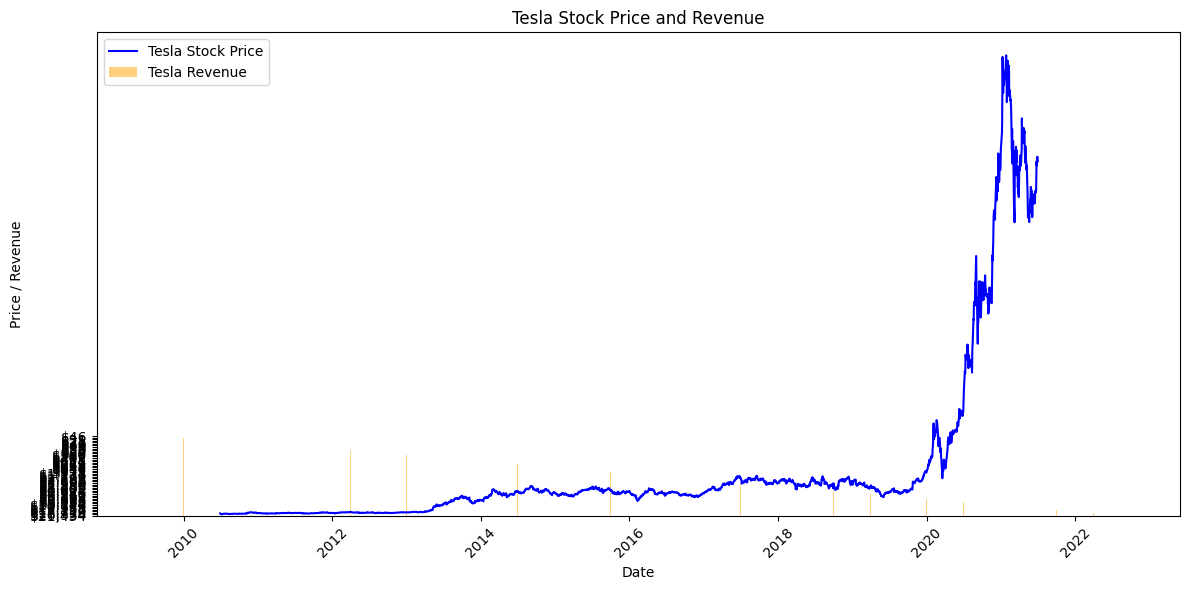

          Date  Revenue
0   2022-09-30  $21,454
1   2022-06-30  $16,934
2   2022-03-31  $18,756
3   2021-12-31  $17,719
4   2021-09-30  $13,757
5   2021-06-30  $11,958
6   2021-03-31  $10,389
7   2020-12-31  $10,744
8   2020-09-30   $8,771
9   2020-06-30   $6,036
10  2020-03-31   $5,985
11  2019-12-31   $7,384
12  2019-09-30   $6,303
13  2019-06-30   $6,350
14  2019-03-31   $4,541
15  2018-12-31   $7,226
16  2018-09-30   $6,824
17  2018-06-30   $4,002
18  2018-03-31   $3,409
19  2017-12-31   $3,288
20  2017-09-30   $2,985
21  2017-06-30   $2,790
22  2017-03-31   $2,696
23  2016-12-31   $2,285
24  2016-09-30   $2,298
25  2016-06-30   $1,270
26  2016-03-31   $1,147
27  2015-12-31   $1,214
28  2015-09-30     $937
29  2015-06-30     $955
30  2015-03-31     $940
31  2014-12-31     $957
32  2014-09-30     $852
33  2014-06-30     $769
34  2014-03-31     $621
35  2013-12-31     $615
36  2013-09-30     $431
37  2013-06-30     $405
38  2013-03-31     $562
39  2012-12-31     $306
40  2012-09-30  

In [40]:

# Call the make_graph function
make_graph(tesla_data, tesla_revenue, 'Tesla')
tables = soup.find_all('table')

data = []

for table in tables:
    if "Tesla Quarterly Revenue" in table.text: 
        for row in table.find_all('tr')[1:]:
            cols = row.find_all('td')
            if len(cols) >= 2: 
                date = cols[0].text.strip()  # Extract date
                revenue = cols[1].text.strip()  # Extract revenue
                data.append({'Date': date, 'Revenue': revenue})

tesla_revenue = pd.DataFrame(data)

print(tesla_revenue)


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


In [41]:
# Check tables to identify the one with GameStop revenue
for i, table in enumerate(tables):
    print(f"Table {i}:\n", table.text)
data = []

for table in tables:
    if "GameStop Revenue" in table.text:  
        for row in table.find_all('tr')[1:]:  
            cols = row.find_all('td')
            if len(cols) >= 2:  
                date = cols[0].text.strip()  
                revenue = cols[1].text.strip()  
                data.append({'Date': date, 'Revenue': revenue})

gme_revenue = pd.DataFrame(data)

# Clean the Revenue column: remove dollar signs and commas
if not gme_revenue.empty:
    gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',', '', regex=True).str.replace('$', '', regex=True)
    gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')
    gme_revenue.dropna(inplace=True)

# Display the DataFrame
print("GameStop Revenue Data:")
print(gme_revenue.tail())


Table 0:
 


Tesla Annual Revenue(Millions of US $)




2021
$53,823


2020
$31,536


2019
$24,578


2018
$21,461


2017
$11,759


2016
$7,000


2015
$4,046


2014
$3,198


2013
$2,013


2012
$413


2011
$204


2010
$117


2009
$112



Table 1:
 


Tesla Quarterly Revenue(Millions of US $)




2022-09-30
$21,454


2022-06-30
$16,934


2022-03-31
$18,756


2021-12-31
$17,719


2021-09-30
$13,757


2021-06-30
$11,958


2021-03-31
$10,389


2020-12-31
$10,744


2020-09-30
$8,771


2020-06-30
$6,036


2020-03-31
$5,985


2019-12-31
$7,384


2019-09-30
$6,303


2019-06-30
$6,350


2019-03-31
$4,541


2018-12-31
$7,226


2018-09-30
$6,824


2018-06-30
$4,002


2018-03-31
$3,409


2017-12-31
$3,288


2017-09-30
$2,985


2017-06-30
$2,790


2017-03-31
$2,696


2016-12-31
$2,285


2016-09-30
$2,298


2016-06-30
$1,270


2016-03-31
$1,147


2015-12-31
$1,214


2015-09-30
$937


2015-06-30
$955


2015-03-31
$940


2014-12-31
$957


2014-09-30
$852


2014-06-30
$769


2014-03-31
$621


2013-12-31


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```toggle ## Change Log
```
```toggle | Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
```
```toggle | ----------------- | ------- | ------------- | ------------------------- |
```
```toggle | 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
```
```toggle | 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
```
```toggle | 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |
```
